In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,RandomOverSampler  
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score,auc, roc_auc_score, accuracy_score,roc_curve,average_precision_score, classification_report,precision_recall_curve
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
data= pd.read_csv('/content/drive/MyDrive/creditcard.csv',encoding="utf-8",low_memory=False)
print("The shape of :", data.shape)

The shape of : (284807, 31)


###OverSampler Model :

In [53]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples= 10000, weights=[.99])
print(Counter(y))
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))
Counter({0: 9844, 1: 9844})

Counter({0: 9867, 1: 133})
Counter({0: 9867, 1: 9867})


Counter({0: 9844, 1: 9844})

In [54]:
# Class count
count_class_0, count_class_1 = data.Class.value_counts()

# Divide by class
df_class_0 = data[data['Class'] == 0]
df_class_1 = data[data['Class'] == 1]

In [55]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [56]:
y_over = df_test_over['Class']
X_over = df_test_over.drop('Class', axis = 1)

In [57]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, test_size = 0.2, random_state = 42)

In [58]:
# Check the number of records after over sampling
print(sorted(Counter(y_train_over).items()))
print(sorted(Counter(y_test_over).items()))

[(0, 227569), (1, 227335)]
[(0, 56746), (1, 56980)]


###LogisiticRegression Model :

              precision    recall  f1-score   support

           0   0.927742  0.966359  0.946657     56746
           1   0.965048  0.925044  0.944623     56980

    accuracy                       0.945659    113726
   macro avg   0.946395  0.945701  0.945640    113726
weighted avg   0.946434  0.945659  0.945638    113726

0.9457358035981218
0.9456588642878497
Specificity :  0.9250438750438751


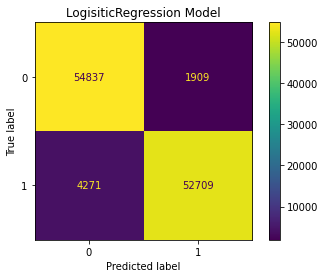

In [59]:
# Train the LogisiticRegression model
logreg = LogisticRegression()
logreg.fit(X_train_over,y_train_over)
y_over_pred1 = logreg.predict(X_test_over)

#Check the model performance
print(classification_report(y_test_over, y_over_pred1,digits=6))

# Check scores
print (logreg.score(X_train_over, y_train_over))
print(logreg.score(X_test_over,y_test_over))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test_over, y_over_pred1, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(logreg, X_test_over, y_test_over)  
plt.title('LogisiticRegression Model')
plt.show()

###DecisionTree Model :

              precision    recall  f1-score   support

           0   0.906644  0.976545  0.940297     56746
           1   0.974698  0.899860  0.935785     56980

    accuracy                       0.938123    113726
   macro avg   0.940671  0.938202  0.938041    113726
weighted avg   0.940741  0.938123  0.938036    113726

0.9392838928653079
0.9381232084132036
Specificity :  0.8998595998595998


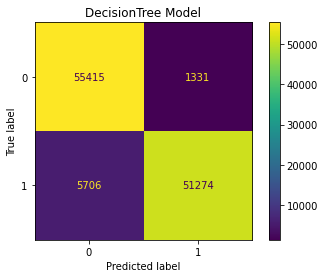

In [60]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_over,y_train_over)
y_over_pred2 = clf.predict(X_test_over)

# Check the model performance
print(classification_report(y_test_over, y_over_pred2,digits=6))

# Check scores
print (clf.score(X_train_over,y_train_over))
print(clf.score(X_test_over,y_test_over))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test_over, y_over_pred2, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(clf, X_test_over, y_test_over)  
plt.title('DecisionTree Model')
plt.show()

###KNearest Model :

              precision    recall  f1-score   support

           0   1.000000  0.998872  0.999436     56746
           1   0.998878  1.000000  0.999439     56980

    accuracy                       0.999437    113726
   macro avg   0.999439  0.999436  0.999437    113726
weighted avg   0.999438  0.999437  0.999437    113726

0.9997428028770905
0.99943724390201
Specificity :  1.0


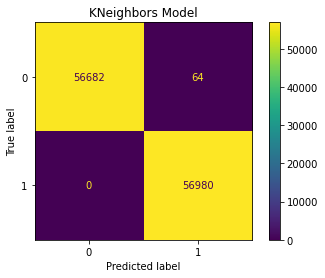

In [61]:
# Train KNeighbors Classifer
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_over, y_train_over)
y_over_pred3 = knn.predict(X_test_over)

# Check the model performance
print(classification_report(y_test_over, y_over_pred3,digits=6))

# Check scores
print (knn.score(X_train_over,y_train_over))
print(knn.score(X_test_over,y_test_over))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test_over, y_over_pred3, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(knn, X_test_over, y_test_over)  
plt.title('KNeighbors Model')
plt.show()